In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

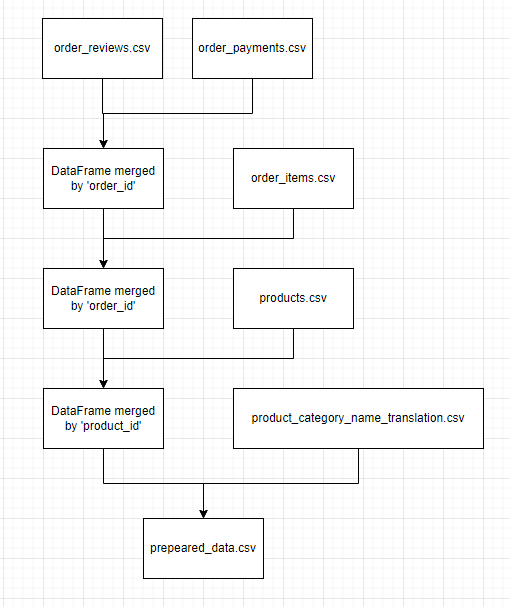

In [4]:
df=pd.read_csv('/content/prepeared_data.csv')
df

,payment_value,review_score,review_comment_title,review_comment_message,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,99.33,1.0,recomer,produto com qualidade ruim amassado e descasca...,79.80,19.53,57.0,921.0,8.0,800.0,17.0,27.0,17.0,home_construction
1,93.72,4.0,no_title,no_message,79.80,13.92,57.0,921.0,8.0,800.0,17.0,27.0,17.0,home_construction
2,340.08,4.0,no_title,no_message,316.05,24.03,58.0,1624.0,3.0,9350.0,20.0,20.0,20.0,home_construction
3,67.12,4.0,no_title,otimo produto recebir no prazo certorecomento,54.40,12.72,57.0,565.0,4.0,800.0,38.0,38.0,22.0,home_construction
4,63.74,5.0,no_title,no_message,54.40,9.34,57.0,565.0,4.0,800.0,38.0,38.0,22.0,home_construction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45580,221.29,4.0,no_title,o produto veio correto estampas e acabamento p...,199.00,22.29,51.0,330.0,1.0,1950.0,33.0,44.0,19.0,cool_stuff
45581,228.79,5.0,no_title,muito bom obrigado,199.00,29.79,51.0,330.0,1.0,1950.0,33.0,44.0,19.0,cool_stuff
45582,221.69,5.0,no_title,no_message,199.00,22.69,51.0,330.0,1.0,1950.0,33.0,44.0,19.0,cool_stuff
45583,217.64,4.0,no_title,no_message,199.00,18.64,51.0,330.0,1.0,1950.0,33.0,44.0,19.0,cool_stuff


In [5]:
data=df.copy()


In [6]:
data['review_comment_message'].fillna('', inplace=True)

## Overview
The key concept of this model is to understand sentimental of revies from the database

## Data Description
- **Dataset Used**: prepeared_data.csv.
- **Source**: Internal company database.
- **Preprocessing Steps**: Handled missing values, normalized numerical features.

## Model Details
- **Type of Model**: MultinomialNB


## Model Details
- **Type of Model**: RandomForestClassifier

I decided to use two classification models to evaluate which will have better scores.





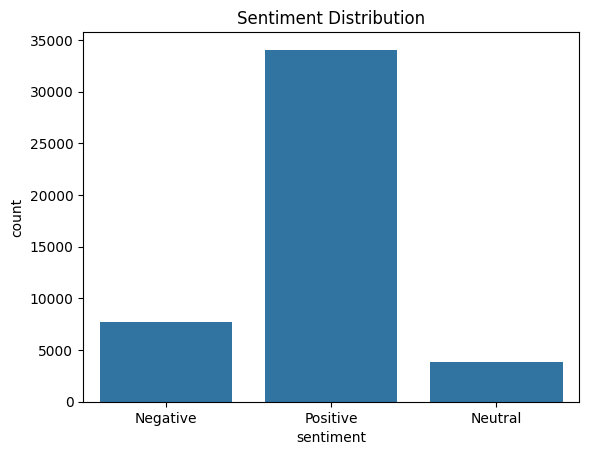

              precision    recall  f1-score   support

    Negative       0.77      0.70      0.73      1576
     Neutral       0.50      0.10      0.17       777
    Positive       0.87      0.97      0.92      6764

    accuracy                           0.85      9117
   macro avg       0.71      0.59      0.60      9117
weighted avg       0.82      0.85      0.82      9117

              precision    recall  f1-score   support

    Negative       0.82      0.71      0.76      1576
     Neutral       0.93      0.15      0.26       777
    Positive       0.87      0.98      0.92      6764

    accuracy                           0.86      9117
   macro avg       0.87      0.61      0.65      9117
weighted avg       0.87      0.86      0.84      9117

         Actual Predicted_NB Predicted_RFC
16529  Positive     Positive      Positive
2372   Positive     Negative      Negative
20060   Neutral     Positive      Positive
18253  Positive     Positive      Positive
28692  Positive     Pos

In [8]:
#Treshholds preparing
data['sentiment'] = data['review_score'].apply(lambda x: 'Positive' if x > 3 else 'Negative' if x < 3 else 'Neutral')

sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.show()

# sentiment analysis model
X = data['review_comment_message']
y = data['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline_1 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])

pipeline_2 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', RandomForestClassifier())
])

pipeline_1.fit(X_train, y_train)
pipeline_2.fit(X_train, y_train)


y_pred_NB = pipeline_1.predict(X_test)
y_pred_RFC = pipeline_2.predict(X_test)

print(classification_report(y_test, y_pred_NB))
print(classification_report(y_test, y_pred_RFC))


results = pd.DataFrame({
    'Actual': y_test,
    'Predicted_NB': y_pred_NB,
    'Predicted_RFC':y_pred_RFC
})

print(results)


In [14]:
# Function to predict sentiment
def analyze_comment(comment):
    sentiment_NB = pipeline_1.predict([comment])[0]
    sentiment_RFC = pipeline_2.predict([comment])[0]
    return {'sentiment_NB': sentiment_NB, 'sentiment_RFC': sentiment_RFC}

# Test the function with examples of each class
example_comments = [
    "produto com qualidade ruim amassado e descascado...",
    "otimo produto recebi no prazo certo recomendo",
    "it was okay"
]

for comment in example_comments:
    result = analyze_comment(comment)
    print(f"Comment: {comment}")
    print(f"Predicted Sentiment 1st with NB 2nd with RFC: {result['sentiment_NB'], result['sentiment_RFC']}")
    print()

Comment: produto com qualidade ruim amassado e descascado...
Predicted Sentiment 1st with NB 2nd with RFC: ('Neutral', 'Negative')

Comment: otimo produto recebi no prazo certo recomendo
Predicted Sentiment 1st with NB 2nd with RFC: ('Positive', 'Positive')

Comment: it was okay
Predicted Sentiment 1st with NB 2nd with RFC: ('Positive', 'Positive')



Based on the test function above, the Random Forest performs better with sentiments than Naive Bayes. However, classifying "Netural" sentiments is challenging for both models, as they often misclassify them as "Positive" or "Negative."." To address this issue, one potential solution could be to increase the number of "Neutral" comments in the data to provide the models with more samples for training in this category.

I don't see a reason to use ML algorithms here, so I decided to use regular extensions to perform price recognition tasks.

In [22]:
import re


def extract_prices(comment):
    # Регулярний вираз для пошуку цін
    pattern = r'\b(?:\d+[.,]?\d*\s?(?:USD|US dollars|dollars|$|reais|R$|))|(?:\$|USD|BRL)\s?\d+[.,]?\d*\b'
    matches = re.findall(pattern, comment)
    return matches if matches else None

# Тестування
example_comments = [
    "The product costs 29.99 USD and is worth every penny.",
    "Ціна товару становить 500 грн, що дуже вигідно.",
    "O preço do produto é de 500 reais, o que é muito vantajoso.",
    "It is available for €45.50, which is reasonable.",
    "You can buy it for $75.99 or 3000 UAH.",
    "Цена в 60 USD приемлема для такого товара.",
    "Available for 1500 ¥, but too expensive."
]

for comment in example_comments:
    prices = extract_prices(comment)
    print(f"Comment: {comment}")
    print(f"Extracted Prices: {prices}")
    print()

Comment: The product costs 29.99 USD and is worth every penny.
Extracted Prices: [' 29.99']

Comment: Ціна товару становить 500 грн, що дуже вигідно.
Extracted Prices: [' 500']

Comment: O preço do produto é de 500 reais, o que é muito vantajoso.
Extracted Prices: [' 500']

Comment: It is available for €45.50, which is reasonable.
Extracted Prices: ['€45.50']

Comment: You can buy it for $75.99 or 3000 UAH.
Extracted Prices: ['$75.99', ' 3000']

Comment: Цена в 60 USD приемлема для такого товара.
Extracted Prices: [' 60']

Comment: Available for 1500 ¥, but too expensive.
Extracted Prices: [' 1500']

